# Instrument Classification with PyTorch: Training a CNN on Mel Spectrograms

## Abstract
Musical instruments produce distinct sounds, each with unique tonal qualities. Traditional classification relies on manual analysis, but deep learning enables automated recognition based on audio features. 

This tutorial explores how to classify instrument sounds using Convolutional Neural Networks (CNNs) in PyTorch. We use the NSynth dataset, which contains thousands of notes played by different instruments, and convert these audio files into Mel spectrograms—visual representations of sound. By training a CNN, we analyse how instruments differ in their frequency patterns. This tutorial covers data preprocessing, model training, hyperparameter tuning, and evaluation, demonstrating how AI can enhance music analysis.

## Learning Objectives
By the end of this tutorial, you will:

1) Understand the fundamentals of musical instrument classification using deep learning.
2) Learn how to convert instrument audio signals into Mel spectrograms for CNN-based analysis.
3) Use the NSynth dataset to train a neural network for instrument sound recognition.
4) Analyse the data to observe any charateristics of certain instruments, in exploratory data analysis.
5) Preprocess audio data using Librosa and prepare it for spectrogram-based classification.
6) Build a Convolutional Neural Network (CNN) in PyTorch for identifying different instruments.
7) Train and hyper-parameter tune a deep learning model using different hyperparameters (e.g. learning rates, batch sizes).
8) Evaluate model performance using accuracy metrics, confusion matrices, and loss curves.
9) Visualise training results and feature patterns using Matplotlib for better interpretability.

## Table Of Contents:
* [Chapter 1: Comparison with Existing Research](#chapter1)
    * [Section 1.1: 'An introduction to Audio Classification with Keras' - Mostafa Ibrahim 2024](#section1_1)
    * [Section 1.2: 'Guide to Audio Classification Using Deep Learning' - Syed Abdul Gaffar 2023](#section1_2)
    * [Section 1.3: 'Music and Instrument Classification using Deep Learning Technics' - Lara Haidar-Ahmad 2018](#section1_3)
    ---
* [Chapter 2: Understanding the Dataset](#chapter2)
    * [Section 2.1: Overview of Nsynth](#section2_1)
    * [Section 2.2: Exploring the Metadata File](#section2_2)
    * [Section 2.3: Using Librosa to Listen to Sample Audio Clips](#section2_3)
    * [Section 2.4: Visualising the Audio Waveform with Mel Spectograms](#section2_4)
    ---
* [Chapter 3: Exploratory Data Analysis (EDA)](#chapter3)
    * [Section 3.1: No. of samples per insturment family](#section3_1)
    * [Section 3.2: Average Waveform of each Instrument Family](#section3_2)
    * [Section 3.3: Note qualities of sounds](#section3_3)
    * [Section 3.4: Statistical Analysis of Instrument Families](#section3_4)
    * [Section 3.5: Correlation Between Instrument Families and Sound Qualities](#section3_5)
    ---
* [Chapter 4:4 Data Preprocessing](#chapter4)
    * [Section 4.1: Data Cleaning](#section4_1)
    * [Section 4.2: Data Transformation](#section4_2)
    * [Section 4.3: Data Splitting](#section4_3)
    ---
* [Chapter 5: Modelling the CNN](#chapter5)
    * [Section 5.1: Defining the CNN Architecture](#section5_1)
    * [Section 5.2: Training the CNN](#section5_2)
    * [Section 5.3: Hyper-parameter tuning](#section5_3)
    * [Section 5.4: Final Model Evaluation](#section5_4)
    ---
* [Chapter 6: Conclusion & Future Work](#chapter6)

## 1. Comparison with Existing Research <a class="anchor" id="chapter1"></a>

Firstly before exploring our model, let's review existing research on topics similar to ours. In this section, we'll discuss the pros and cons of each, and see any improvements we can make in our model.

### 1.1. 'An introduction to Audio Classification with Keras' <a id=section1_1></a>

[Article here](https://wandb.ai/mostafaibrahim17/ml-articles/reports/An-Introduction-to-Audio-Classification-with-Keras--Vmlldzo0MDQzNDUy?utm_source=chatgpt.com)

This article provides a comprehensive overview of audio classification using the Keras deep learning library in Python. It offers as a vsaluable starting point for programmers interested in audio classification with Keras, providing practical guidance.

---
It details the steps in how audio classification works:
<img src="intro to audio classification with keras pic.png">

---
The article walks through the process of:
- Preparing audio data
- Extracting features such as Mel-frequency cepstral coefficients (MFCCs) 
- Building a convolutional neural network (CNN) model for classification. 

Additionally, it incorporates the use of Weights & Biases (W&B) for experiment tracking, enabling better monitoring and visualisation of model performance. The tutorial is designed to be accessible while also offering practical hands-on examples, making it suitable for both beginners and experienced machine learning practitioners interested in audio processing.

---

| Pros | Cons |
|:--------------|:--------------
| **+ Comprehensive Coverage**: The article thoroughly explains the audio classification process, from data preprocessing to model evaluation, making it accessible to both beginners and experienced practitioners. | **- Limited Discussion on Model Optimisation**: While the article presents a basic model, it lacks an in-depth discussion on hyperparameter tuning and potential improvements to enhance model performance.
| **+ Hands-On Example**: It provides a practical example using the UrbanSound8K dataset, guiding readers through each step of building a 1D Convolutional Neural Network (CNN) model with Keras. | **- Assumes Prior Knowledge**: Some sections assume familiarity with concepts like MFCCs and spectrograms, which might require additional research for complete understanding.
| **+ Integration with Weights & Biases (W&B)**: The tutorial demonstrates how to integrate W&B for experiment tracking, offering insights into model performance and facilitating reproducibility.|

---
Now this article uses Keras as opposed to PyTorch, despite mentioning PyTorch is 'one of the most popular open-source deep learning libraries', which is what we will be using. The reason they use Keras is for it's simple and concise syntax, which offers minimal code for model definition, whereas PyTorch requires more code for model defintion. But the overall process offers a good blueprint for how our tutorial will look.

### 1.2. 'Guide to Audio Classification Using Deep Learning'  <a id=section1_2 ></a>

[Article here](https://www.analyticsvidhya.com/blog/2022/04/guide-to-audio-classification-using-deep-learning/?utm_source=chatgpt.com)

This article provides an informative walk-through of audio classification using the UrbanSound8K dataset. It covers essential steps such as data preprocessing, Mel spectrogram extraction, and building a Convolutional Neural Network (CNN) for classifying urban sounds. The tutorial is beginner-friendly and offers code examples using the PyTorch framework. 

The [UrbanSound8K](https://urbansounddataset.weebly.com/urbansound8k.html) dataset contains 8732 labeled urban sounds from 10 classes, such as 'air_conditioner','engine_idling', 'gun_shot', etc.

| Pros | Cons |
|:-----|:-----
**+ Uses PyTorch**: The article uses PyTorch to build a CNN for audio classification, which is what we will be using as well. | **- Dataset not on musical instruments**: We will be using a dataset that consists of musical intruments that need to be classified. We may need to tweak our model different to the one in this article to classify instruments properly. |
| **+ Use of Mel Specotgrams**: This article covers the importance of Mel Spectograms and extracts it's coefficients for each sound to improve sound classification. | **- No focus on hyper-parameter tuning**: The author uses a preset of hyper parameters, with no explanation of why he chose that parameter space for training the model.



### 1.3. 'Music and Instrument Classification using Deep Learning Technics' <a id=section1_3 ></a>

[Paper here](https://cs230.stanford.edu/projects_fall_2019/reports/26225883.pdf)

This paper focuses on music and instrument classification using deep learning techniques. It implements a CNN model that processes audio streams as Mel spectrograms and classifies them into the following categories:
- Piano
- Drums
- Flute
- Other

The project utilised the [AudioSet](https://research.google.com/audioset/) dataset that consists of real-world data, that may present additional challenges due to background noise that effect model performance. The model incurred overfitting on the original data, and to mitigate this, the author attempts data augmentation techniques such as integrating random white noise to audio samples of training set before extract Mel Spectograms.

---
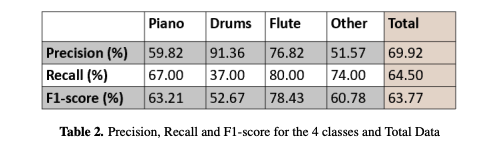

From the table above, we can see the model attained an average precision of 70% , an average recall of 65%, and an average F1-score of 64%.

---
| Pros | Cons |
|:-----|:-----|
|**+ Practical Approach**: Uses real-world, noisy data. This differs to ours as we will be using data of AI generated sounds. | **- Limited instrument set**: The model can only classify input into 4 classes, which will be a lot less compared to our dataset. |
| **+ Well-defined model and results**:  precision, recall & F1-score lied between 60-70%. | **- Poor Recall on Drums instruments**: The model only correctly identifies 37% of actual drum sounds, meaning many drum instances of misclassified. This could be due to the the percussive nature of background noise from other instruments strongly resembling drum instruments. We will ensure the range of % classification accuracy across different instruments is narrow.

## 2. Understanding the Dataset <a class="anchor" id="chapter2"></a>

### 2.1. Overview of Nsynth <a id="section2_1"></a>
#### What is NSynth? 
NSynth (Neural Synthesizer) is a dataset by Google Magenta containing over 300,000 musical notes from different instruments generated through the use of deep neural networks.

#### Why is it useful? 
Unlike traditional music datasets, NSynth provides individual notes instead of full songs, making it ideal for understanding the unique characteristics of instrument sounds.
#### What kind of data does it contain?
Each note is labeled with:
- Instrument family (e.g., piano, guitar, strings, brass)
- Pitch (MIDI note number)
- Velocity (how hard the note was played)
- Audio waveform (stored as .wav files)

Here is the original documentation for the data: https://magenta.tensorflow.org/datasets/nsynth

### 2.2. Exploring the Metadata file <a id="section2_2"></a>

Due to limited computation resources, we will only be training and testing on the nysnth-valid dataset. This still contains a sufficient number of samples, with over 12,000, suitable for training and testing on.

NSynth provides a JSON metadata file that contains information about each audio sample. Let’s load and inspect it:

In [1]:
import json
import os

# Path to the extracted dataset
dataset_path = "nsynth-valid"

# metadata file 
json_file = os.path.join(dataset_path, "examples.json")

# Load NSynth metadata
with open(json_file) as f:
    nsynth_metadata = json.load(f)
    
# Print the total number of samples
print(f"Total samples in NSynth: {len(nsynth_metadata)}")

# Show the keys of the metadata dictionary
print("Metadata keys:", list(nsynth_metadata.keys())[:3])  # Display first 3 keys


Total samples in NSynth: 12678
Metadata keys: ['keyboard_acoustic_004-060-025', 'bass_synthetic_033-050-100', 'bass_synthetic_009-052-050']


    NSynth stores each sample as a key-value pair, where the key is a unique ID for each audio clip.

Now let's explore a single sample in the dataset:

In [91]:
# Pick a random sample ID, in this case its the 5th sample
sample_id = list(nsynth_metadata.keys())[5]

# Print the metadata for this sample
print(json.dumps(nsynth_metadata[sample_id], indent=4))


{
    "note_str": "bass_synthetic_098-040-025",
    "sample_rate": 16000,
    "qualities_str": [
        "dark"
    ],
    "instrument_source": 2,
    "instrument_family_str": "bass",
    "instrument_family": 0,
    "note": 254242,
    "instrument_source_str": "synthetic",
    "qualities": [
        0,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    "pitch": 40,
    "instrument_str": "bass_synthetic_098",
    "instrument": 803,
    "velocity": 25
}


#### What do these features mean?
- __"instrument_family_str"__: tells us this is a bass instrument.
- __"instrument_source_str"__: tells us it’s a synthetic bass.
- __"pitch"__:  is 40, meaning this is a low note.
- __"velocity"__: is 25, meaning the note was played with low intensity (lightly tapped on the keyboard).
- __"sample_rate"__: is 16,000 Hz, which is the frequency resolution of the audio clip.

So we've explored what a single sample looks like, but now let's see how many total instruments there are:

In [3]:
# Get unique instrument families
instrument_families = set(sample["instrument_family_str"] for sample in nsynth_metadata.values())

print("Unique Instrument Families in NSynth:")
print(instrument_families)
print("Total Number of Instruments:",len(instrument_families)) 


Unique Instrument Families in NSynth:
{'bass', 'flute', 'keyboard', 'vocal', 'guitar', 'organ', 'reed', 'mallet', 'string', 'brass'}
Total Number of Instruments: 10


### 2.3. Using Librosa to Listen to Sample Audio Clips <a id="section2_3"></a>

#### What is librosa?
librosa is a Python library that makes it easy to work with audio files. It allows us to:
- Load audio from files (WAV, MP3 and more).
- Play sounds directly in Jupyter Notebook.
- Visualise waveforms (how sound varies over time).
- Convert audio into spectrograms for machine learning.

         In simple terms, librosa translates sounds into numbers, making it possible for a computer to analyse music and speech.

Now, let’s load and listen to an audio file using librosa:


In [111]:
import librosa
import librosa.display
import IPython.display as ipd

audio_path = "nsynth-valid/audio/vocal_acoustic_000-070-127.wav"

# Load a sample audio file, lets go with a vocal sample
sample_audio, sr = librosa.load(audio_path, sr=None)

# Play the audio
ipd.Audio(sample_audio, rate=sr)


#### Let's break down the following line of code 
    librosa.load(audio_path, sr=None)
- .load: Loads the WAV file as a NumPy array.
- sr=None: keeps the original sample rate, which is 16kHz (important for AI models).
- sample_audio, sr: audio contains the sound as numbers, and sr is the sample rate (how many data points per second).

#### What is a Sample Rate?
The sample rate (sr) is how many times per second the audio is measured.
- For NSynth, it's 16,000 Hz (16 kHz), meaning 16,000 points per second are recorded to represent the sound.
- A higher sample rate = better audio quality, but more data to process.

Let's resample the same audio above and adjust the sample rate

In [110]:
# Resampling orignial 16kHz audio into 8kHz
audio_resampled = librosa.resample(sample_audio, orig_sr=sr, target_sr=8000)
ipd.Audio(audio_resampled, rate=8000)


As we can see, the new audio with a lower sample rate has less quality, and sounds more muffled.

#### But why does sample rate matter for instrumnet classification?

| Sample Rate | Effect on Mel Spectogram | Effect on Model Training |
|:--------:|:--------:|:--------:|
|  8kHz  |  Blurry, missing high frequencies |  Less detailed, may misclassify instruments  |
|  16kHz  |  Balanced, used in NSynth  | Ideal for training, efficient computation   |
|  44.1kHz  |  High detail, large file size  |  More training time, but small gains   |


#### Overall, balancing computational efficiency and data quality is crucial. 
Higher-quality audio files provide more detail but require greater computational power, while lower-quality samples are easier to process but may lose important information. Finding the right balance ensures that our model can learn effectively without unnecessary resource strain.

### 2.4. Visualising the audio waveform with Mel Spectograms  <a id="section2_4"></a>
Now that we've lsitened to the audio, let's explore it's waveform

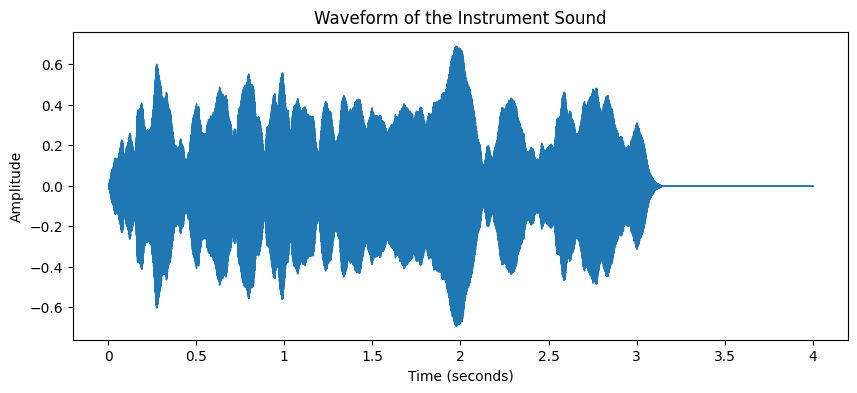

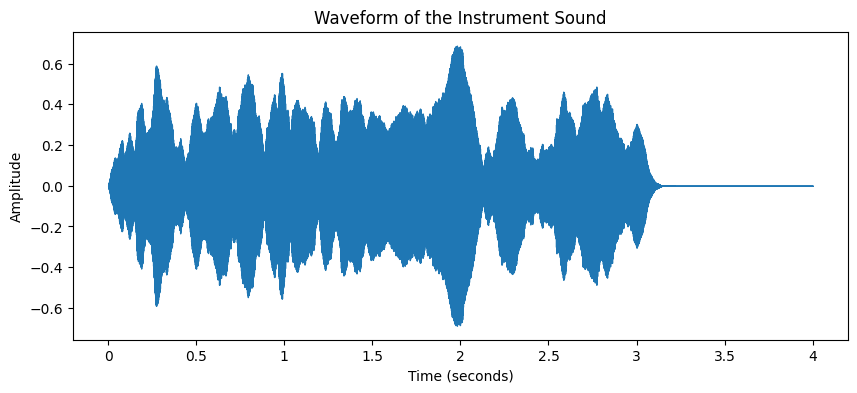

In [23]:
import matplotlib.pyplot as plt # Use matplotlib library to plot the wave

# Plot the waveform of original audio at 16kHz
plt.figure(figsize=(10, 4))
librosa.display.waveshow(sample_audio, sr=16000)
plt.title("Waveform of the Instrument Sound")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

# Plot the waveform of original audio at 8kHz
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_resampled, sr=8000)
plt.title("Waveform of the Instrument Sound")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

You might be wondering why the audio sample with different sample rates have the same graph? This is because sample rate doesn't effect the amplitude (how loud the sound is). 

Therefore, we instead use Mel Spectograms to see the effect of sample rate, by observing the effect on frequency:


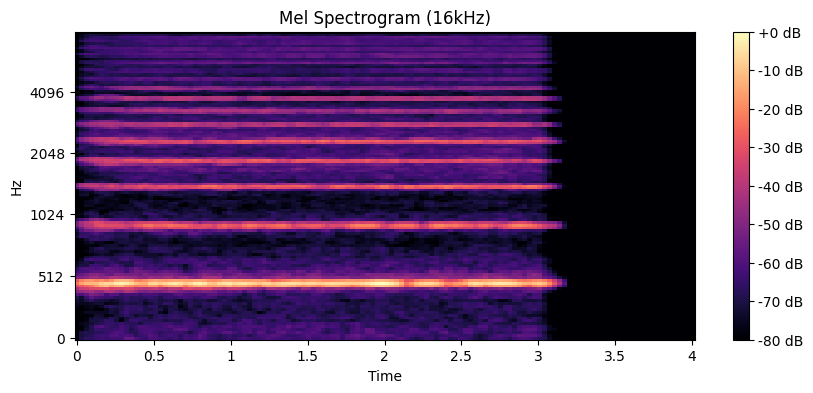

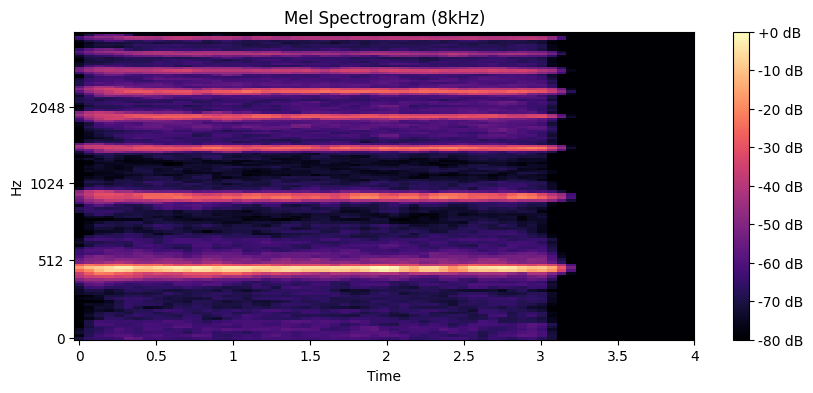

In [24]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Compute Mel Spectrograms
original_mel = librosa.feature.melspectrogram(y=sample_audio, sr=16000, n_mels=128)
resampled_mel = librosa.feature.melspectrogram(y=audio_resampled, sr=8000, n_mels=128)

# Convert to dB scale
original_mel_db = librosa.power_to_db(original_mel, ref=np.max)
resampled_mel_db = librosa.power_to_db(resampled_mel, ref=np.max)

# Plot Original Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(original_mel_db, sr=16000, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram (16kHz)")
plt.show()

# Plot Resampled Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(resampled_mel_db, sr=8000, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram (8kHz)")
plt.show()


As we can see, the range of frequencies for the downsampled sound is around half the range of the original 16kHz sound. It's the higher frequencies downsampling doesn't capture due to the reduce quality of sound.

## 3. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter3"></a>

#### What is EDA?
Exploratory Data Analysis (EDA) is the process of examining and summarising a dataset before building a machine learning model. The goal of EDA is to understand patterns, detect anomalies, and gain insights into the data.

In this project, EDA helps us:
- Understand the dataset structure (metadata, audio samples, labels).
- Identify class imbalances (are some instruments over/underrepresented?).
- Examine audio properties (waveforms, spectrograms, pitch distributions).
- Check for inconsistencies (missing values, different audio durations).
- Ensure data quality before training a deep learning model.

### 3.1. No. of samples per insturment family <a id="section3_1"></a>

To classify instruments, there must be a sufficient number of samples per instrument family. So let's analyse this:

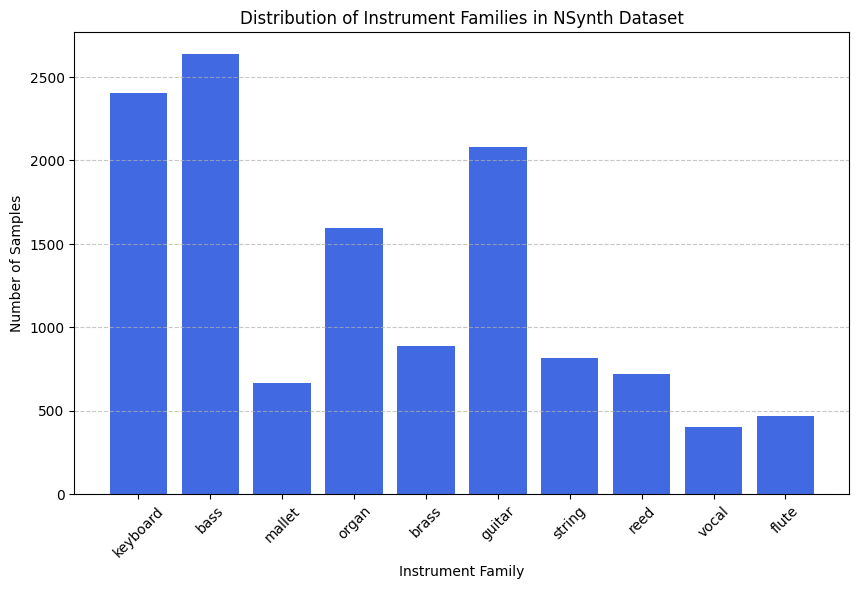

In [25]:
from collections import Counter

with open("nsynth-valid/examples.json", "r") as f:
    metadata = json.load(f)

instrument_family_keys = {0:"bass",
1:"brass",
2:"flute",
3:"guitar",
4:"keyboard",
5:"mallet",
6:"organ",
7:"reed",
8:"string",
9:"synth_lead",
10:"vocal"} #https://magenta.tensorflow.org/datasets/nsynth - key responds to instrument family

instrument_family_counts = Counter(sample_info["instrument_family"] for sample_info in metadata.values())

mapped_counts = {instrument_family_keys[k]: v for k, v in instrument_family_counts.items()}

plt.figure(figsize=(10, 6))
plt.bar(mapped_counts.keys(), mapped_counts.values(), color='royalblue')

# Labels and title
plt.xlabel("Instrument Family")
plt.ylabel("Number of Samples")
plt.title("Distribution of Instrument Families in NSynth Dataset")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

__Imbalance in Instrument Families:__
- The dataset is not evenly distributed across instrument families.
- The most common instrument families are bass (2638 samples), keyboard (2404), and guitar (2081).
- The least common are vocal (404) and flute (470).
- This imbalance could affect the training process, potentially making the model biased toward more frequent instrument families.

__Distribution of Instrument Families:__
- There are more percussive and harmonic instruments (keyboard, bass, guitar, mallet, organ) compared to wind instruments (flute, brass, reed).
- The dataset might be better suited for classifying string and harmonic instruments than distinguishing between wind instruments.

__Potential Challenges in Classification:__
- The low number of vocal samples (404) might make it difficult for the model to generalise well for this category.
- Instrument families with similar timbres (e.g., brass and reed, string and guitar) might have overlapping features, leading to misclassification.


### 3.2. Analysing Average Waveform of each Instrument Family <a id="section3_2"></a>

A property we can look at is by analysing the properties of waves for each insturment, and distinguish them from each other. The code below:
- Establishes two dictionary variables - waveform_sums & waveform_counts, where the key will be the instrument family (guitar, piano, etc.) and assign the family's wave count and wave sum.
- Takes the json key of the sound, and maps it to it's corresponding audio in the audio file, by adding .wav
- Once the wave of that sound is taken, we increment that insturment family's waveform sum and waveform count
- Take the average of each instrument family by:
      
                          Instrument family waveform sum / instrument family waveform count

In [26]:
audio_folder = "nsynth-valid/audio"

waveform_sums = {}
waveform_counts = {} 

num_samples_per_family = 400

for sample_id, sample_info in metadata.items():

    instrument_family = sample_info["instrument_family"]
    audio_path = os.path.join(audio_folder, sample_id + ".wav")
    
    try:
        audio, sr = librosa.load(audio_path, sr=16000)  # Ensure consistent sample rate (16kHz)
        # Trimmed to a fixed length (4 sec * 16000 samples/sec)
        target_length = 4 * sr
        if len(audio) < target_length:
            audio = np.pad(audio, (0, target_length - len(audio)))  # Pad with zeros
        else:
            audio = audio[:target_length]  # Trim to target length
            
        # Initialise storage for each instrument family
        if instrument_family not in waveform_sums:
            waveform_sums[instrument_family] = np.zeros_like(audio)
            waveform_counts[instrument_family] = 0
        # Sum waveforms and track count
        waveform_sums[instrument_family] += audio
        waveform_counts[instrument_family] += 1
        # Stop after a limited number of samples per family
        if waveform_counts[instrument_family] >= num_samples_per_family:
            continue

    except Exception as e:
        print(f"Error loading {audio_path}: {e}")

waveform_avgs = {family: waveform_sums[family] / waveform_counts[family] for family in waveform_sums}

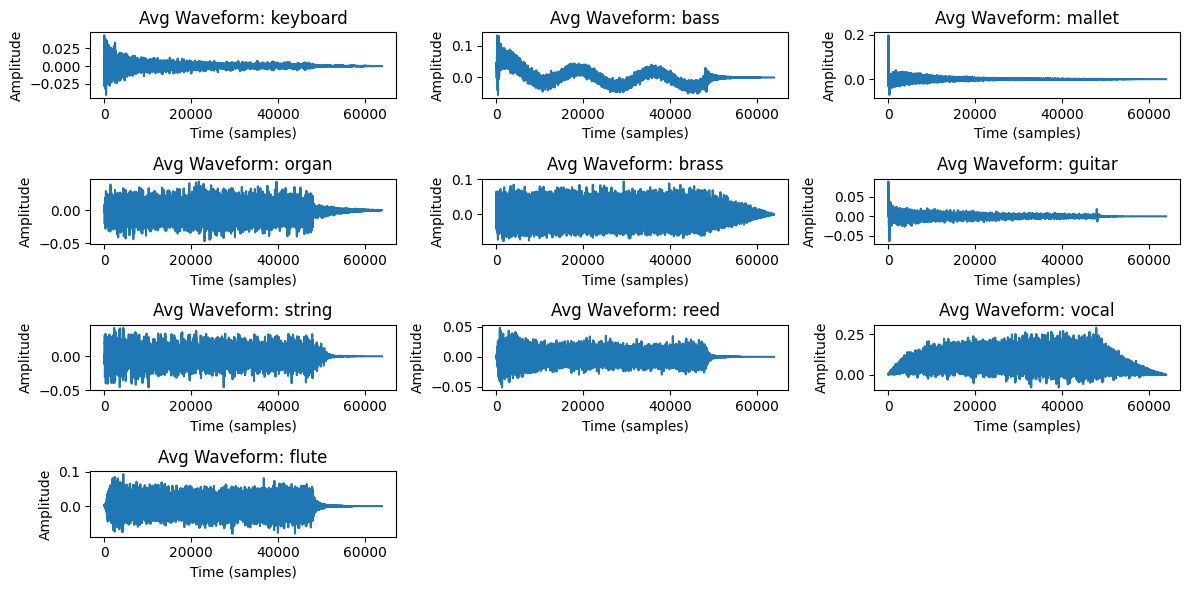

In [27]:
plt.figure(figsize=(12, 6))

for i, (family, avg_waveform) in enumerate(waveform_avgs.items()):
    plt.subplot(4, 3, i + 1)  # Adjust layout for multiple plots
    plt.plot(avg_waveform, label=family)
    plt.title(f"Avg Waveform: {instrument_family_keys[family]}")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    

plt.tight_layout()
plt.show()


#### What is Attack, Decay and Sustain?

**Attack**: The initial phase of a sound where amplitude rises from silence to its peak. A sharp attack means the sound starts abruptly (e.g. a piano key press or drum hit).

**Decay**: The phase after the peak where amplitude decreases. Short decay means the sound fades quickly (e.g. a plucked guitar string), while a long decay means it lingers.

**Sustain**: The period during which the sound maintains its amplitude before fading out. Instruments like organs and violins have long sustain, while pianos and mallets have shorter sustain.

So based on these charateristics, we can observe the waveforms above:

**Attack & Decay Characteristics**
- Mallet, Guitar, Keyboard, Brass: Sharp attack at the beginning (high amplitude at time = 0), followed by a gradual decay.
- Bass, String, Reed, Vocal: More sustained amplitude, indicating gradual onset and prolonged sound.
- Organ & Flute: Sustained waveform with less decay, suggesting continuous sound production.

**Amplitude Variation**
- Mallet & Vocal: Show high peak amplitudes, meaning they have strong transient energy.
- String, Organ, Flute, Reed: More evenly spread amplitude, indicating sustained notes with smooth variations.
- Brass & Guitar: Noticeable decay but not as sharp as mallet or keyboard.

**Temporal Structure (Time-Samples Distribution)**
- Brass: Increases in amplitude over time, possibly due to crescendo playing style.
- Vocal: Builds up gradually, suggesting breath-driven energy.
- Keyboard & Guitar: Start strong and decay quickly, characteristic of plucked/struck instruments.

**Comparing Sustained vs. Percussive Sounds**
- Sustained: Organ, String, Flute, Reed, and Vocal have more even amplitude distributions.
- Percussive: Keyboard, Mallet, and Guitar show strong transient peaks and quick decays.


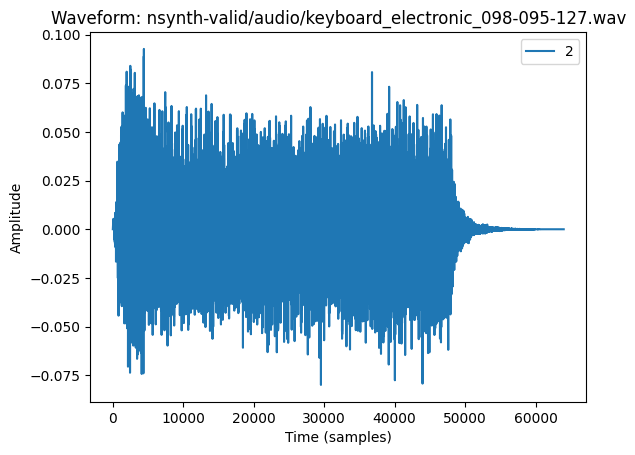

In [109]:
import os
import random
import librosa
import librosa.display
import IPython.display as ipd

# List all available WAV files
audio_files = [f for f in os.listdir(audio_folder) if f.endswith(".wav")]

# Randomly pick an audio file
random_audio = random.choice(audio_files)
audio_path = os.path.join(audio_folder, random_audio)


# Plot the audio waverform
plt.plot(avg_waveform, label=family)
plt.title(f"Waveform: {audio_path}")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()



The random audio sample taken above is an electronic keyboard, but as we can see the waveform doesn't resemble the average waveform of the insturment family 'keyboards' in the above cell. This sound is more sustained compared to the average waveform, that has a sharp attack and short decay.

Therefore, further analysis must be done.

### 3.3. Note qualities of sounds <a id="section3_3"></a>

In this section, we will analyse the 'qualities' value each audio sample has. 

Reference from: https://magenta.tensorflow.org/datasets/nsynth

*'We provide quality annotations for the 10 different note qualities described below. None of the tags are mutually exclusive by definition except for “bright” and “dark”. However, it is possible for a note to be neither “bright” nor “dark”.'*

The following table was also taken from the above link:

| Index | ID             | Description |
|:-------|:--------------|:----------------------------------------------------------------|
| 0     | bright        | A large amount of high frequency content and strong upper harmonics. |
| 1     | dark         | A distinct lack of high frequency content, giving a muted and bassy sound. Also sometimes described as ‘Warm’. |
| 2     | distortion    | Waveshaping that produces a distinctive crunchy sound and presence of many harmonics. Sometimes paired with non-harmonic noise. |
| 3     | fast_decay   | Amplitude envelope of all harmonics decays substantially before the ‘note-off’ point at 3 seconds. |
| 4     | long_release | Amplitude envelope decays slowly after the ‘note-off’ point, sometimes still present at the end of the sample at 4 seconds. |
| 5     | multiphonic  | Presence of overtone frequencies related to more than one fundamental frequency. |
| 6     | nonlinear_env | Modulation of the sound with a distinct envelope behavior different than the monotonic decrease of the note. Can also include filter envelopes as well as dynamic envelopes. |
| 7     | percussive   | A loud non-harmonic sound at note onset. |
| 8     | reverb       | Room acoustics that were not able to be removed from the original sample. |
| 9     | tempo-synced | Rhythmic modulation of the sound to a fixed tempo. |

if the index has a value of 1, the note has that quality, if not, it is given the value 0


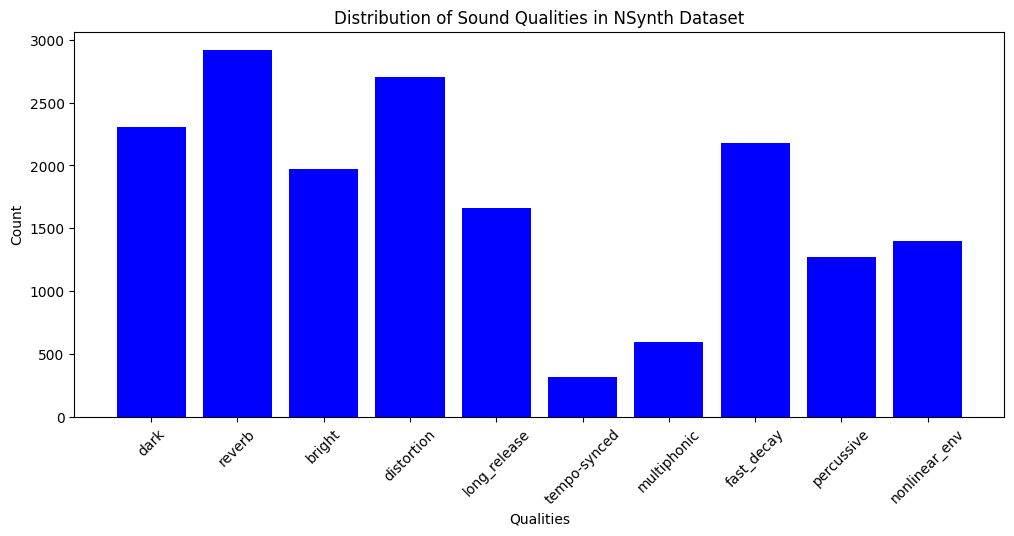

In [30]:
from collections import Counter

# Initialise a counter for each quality
quality_counts = Counter()

# List of quality names
quality_names = [
    "bright", "dark", "distortion", "fast_decay", "long_release",
    "multiphonic", "nonlinear_env", "percussive", "reverb", "tempo-synced"
]

# Iterate through the dataset and count occurrences of each quality
for sample_info in metadata.values():
    for idx, value in enumerate(sample_info["qualities"]):  # Loop through 0s and 1s
        if value == 1:  # Only count qualities that are present
            quality_counts[quality_names[idx]] += 1

# Convert to lists for plotting
qualities, counts = zip(*quality_counts.items())

# Create bar plot
plt.figure(figsize=(12, 5))
plt.bar(qualities, counts, color='blue')
plt.xlabel("Qualities")
plt.ylabel("Count")
plt.title("Distribution of Sound Qualities in NSynth Dataset")
plt.xticks(rotation=45)
plt.show()


**Insights**:
- The dataset likely contains many reverberated, distorted, and dark-toned sounds, which could be due to the nature of synthesized or recorded sounds used in NSynth.
- Bright and dark qualities aren't mutually exclusive, but dark appears more frequently, suggesting a preference toward lower-frequency content.
- Percussive sounds are less frequent, meaning NSynth may focus more on sustained or tonal sounds rather than strong attack-based samples.
- Tempo-synced sounds are rare, indicating that rhythmic modulation is not a primary characteristic in most samples.

There's also a feature called 'quality_str' that is a list of the note qualities of each sounds. Let's see if the sums of 'quality_str' across sounds aligns with the sums of 'qualities'.

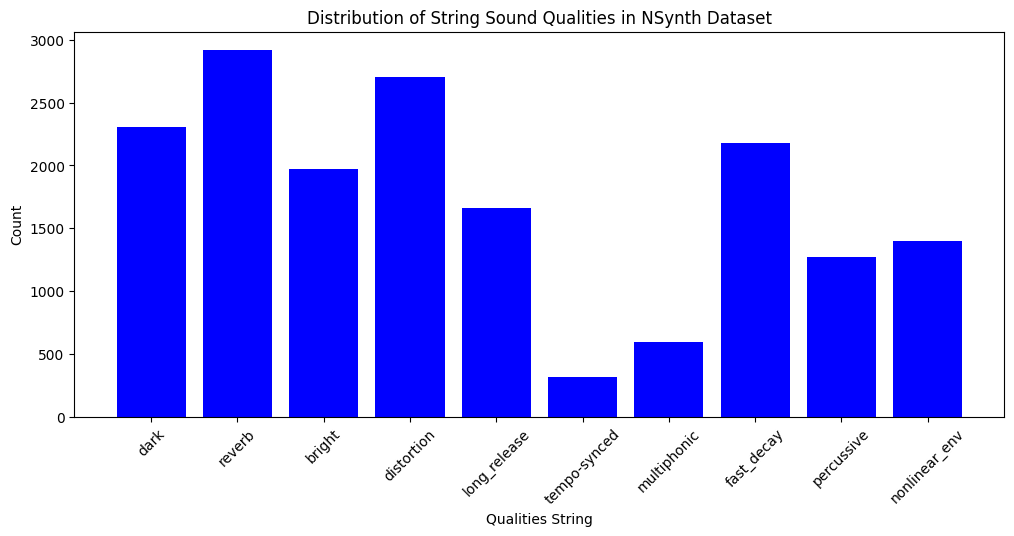

In [31]:
quality_counts_str = Counter()
for sample_info in metadata.values():
    for quality_str in sample_info['qualities_str']:
        quality_counts_str[quality_str] += 1
        
    
# Convert to lists for plotting
qualities_str, counts = zip(*quality_counts_str.items())

# Create bar plot
plt.figure(figsize=(12, 5))
plt.bar(qualities_str, counts, color='blue')
plt.xlabel("Qualities String")
plt.ylabel("Count")
plt.title("Distribution of String Sound Qualities in NSynth Dataset")
plt.xticks(rotation=45)
plt.show()


As we can see above, sums across both 'qualities' and 'qualities_str' render the same results.

**What does this mean?**

This means we can drop one of these columns in data preprocessing to avoid redundancy

### 3.4. Statistical analysis of Instrument Families <a id="section3_4"></a>

Next, we'll use Python's [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) library for statistcal analysis on the dataset.

Pandas allows for:
- Easy data manipulation & cleaning
- Efficient Handling of Large Datasets
- Strong integration with data science libraries


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(metadata, orient='index')

# Get basic statistics on sample pitches per instrument family using .describe()
pitch_stats = df.groupby("instrument_family")["pitch"].describe()

print(pitch_stats)


                    count       mean        std   min   25%   50%    75%  \
instrument_family                                                          
0                  2638.0  58.992039  25.245408   9.0  38.0  56.0  80.00   
1                   886.0  63.328442  18.408160  24.0  51.0  62.5  76.00   
2                   470.0  72.557447  24.196775  21.0  55.0  76.0  92.75   
3                  2081.0  63.484383  24.722457  21.0  42.0  63.0  84.00   
4                  2404.0  63.051165  23.924913  21.0  43.0  62.0  83.00   
5                   663.0  72.722474  24.774113  21.0  54.0  75.0  93.00   
6                  1598.0  57.634543  22.066311   9.0  40.0  57.0  75.00   
7                   720.0  60.605556  16.088679  31.0  48.0  60.5  72.25   
8                   814.0  50.828010  17.630202  24.0  37.0  49.0  62.00   
10                  404.0  62.457921  22.825820  21.0  46.0  61.0  79.00   

                     max  
instrument_family         
0                  108.0  
1     

### 3.5. Correlation Between Instrument Families and Sound Qualities <a id="section3_5"></a>

This next section highlights the correlation between instrument families and sound qualities

Here, we an see which instruments are darker, have a longer decay, contain more reverb etc.

This is crucial for sound classification, as certain sounds charaterisitcs between instruments help machine learning models differentiate between different insturments



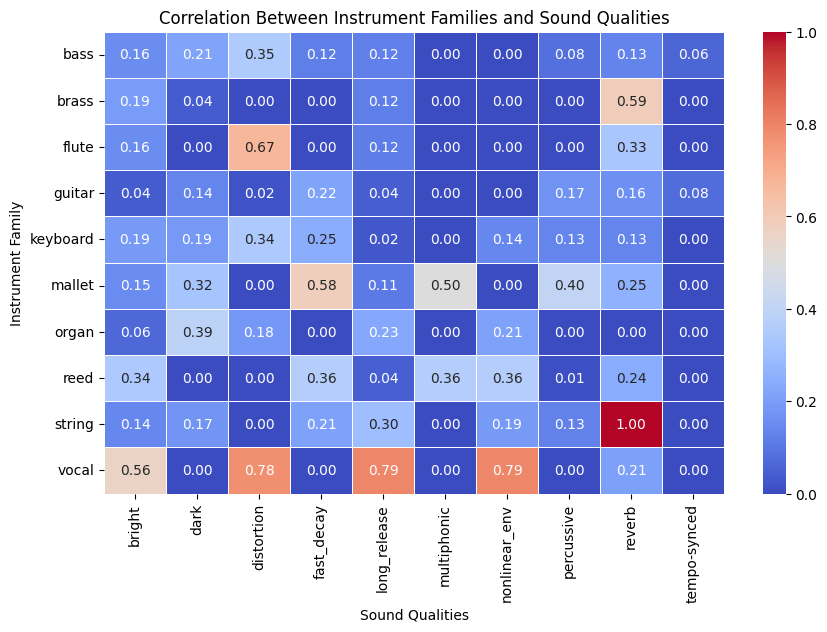

In [33]:
import numpy as np

qualities_map = {0: "bright", 1:"dark", 2:"distortion", 3:"fast_decay", 4:"long_release",
    5:"multiphonic", 6:"nonlinear_env", 7:"percussive", 8:"reverb", 9:"tempo-synced"}

# Convert qualities list to DataFrame
qualities_df = pd.DataFrame(df["qualities"].tolist(), index=df.index)

qualities_df.rename(columns=qualities_map, inplace=True)

# Add instrument family labels
qualities_df["instrument_family"] = df["instrument_family"].map(instrument_family_keys)


# Compute mean occurrence of each quality per instrument family
quality_correlation = qualities_df.groupby("instrument_family").mean()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(quality_correlation, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Instrument Families and Sound Qualities")
plt.xlabel("Sound Qualities")
plt.ylabel("Instrument Family")
plt.show()



__Key Observations__

| **Instrument Family** | **Key Correlations** | **Observations** |
|:----------------------|:---------------------|:------------------|
| **Vocal** | Distortion (0.78), Fast Decay (0.79), Long Release (0.79) | Vocal samples exhibit a combination of these qualities, likely due to the nature of human voice dynamics. |
| **String** | Reverb (1.00), Long Release (0.30), Fast Decay (0.21) | Strong reverb correlation aligns with the natural resonance of string instruments. |
| **Flute** | Distortion (0.67), Reverb (0.33) | Unexpectedly high distortion correlation, though reverb presence aligns with its acoustic properties. |
| **Mallet** | Long Release (0.58), Multiphonic (0.50) | Indicates sustained sound with rich overtone characteristics. |
| **Reed** | Bright (0.34), Fast Decay (0.36) | Shows balanced qualities with slight emphasis on brightness and fast decay. |
| **Brass** | Percussive (0.59) | Matches the sharp and punchy attack nature of brass instruments. |
| **Keyboard** | No extreme values, moderate spread | Demonstrates versatility in sound qualities. |

**Low Correlations** Tempo-Synced (Minimal): Tempo-synced quality is not prominent, indicating rarity in this dataset. 


## 4. Data Preprocessing <a class="anchor" id="chapter4"></a>

Data preprocessing is the process of preparing raw data for analysis and modelling.

Thorough data pre-processing is vital in producing an accurate predictive model. It ensures the quality of data is optimal – through handling issues like missing values, outliers, inconsistencies, and noise to enhance model prediction accuracy and lead to better generalisation to new data for future instrument classification. 

In data preprocessing, I will cover the following areas:
1. **Data Cleaning** – Identifying and correcting/removing erroneous data and outliers 
2. **Data Transformation/Reduction** - Normalise/standardise numerical features, feature selection and engineering
3. **Data Splitting** - Divide data into training, validation, and test sets.


### 4.1. Data Cleaning <a id="section4_1"></a>


In [34]:
df.head()

,note_str,sample_rate,qualities_str,instrument_source,instrument_family_str,instrument_family,note,instrument_source_str,qualities,pitch,instrument_str,instrument,velocity
keyboard_acoustic_004-060-025,keyboard_acoustic_004-060-025,16000,"[dark, reverb]",0,keyboard,4,278915,acoustic,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0]",60,keyboard_acoustic_004,327,25
bass_synthetic_033-050-100,bass_synthetic_033-050-100,16000,[dark],2,bass,0,270361,synthetic,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",50,bass_synthetic_033,417,100
bass_synthetic_009-052-050,bass_synthetic_009-052-050,16000,"[bright, distortion, long_release]",2,bass,0,270001,synthetic,"[1, 0, 1, 0, 1, 0, 0, 0, 0, 0]",52,bass_synthetic_009,150,50
keyboard_electronic_003-064-127,keyboard_electronic_003-064-127,16000,[],1,keyboard,4,50978,electronic,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",64,keyboard_electronic_003,65,127
bass_synthetic_034-030-050,bass_synthetic_034-030-050,16000,"[distortion, tempo-synced]",2,bass,0,265159,synthetic,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1]",30,bass_synthetic_034,420,50


From the dataframe above, we can identify some problems for modelling:
- __Redundant columns:__ 
    - instrument_str, note_str (both imply the same thing), we will only use one of these.
    - quality_str, qualities (as mentioned in EDA), only use one of these columns
    - instrument_family, instument_family_str,  only use one of these columns
    - instrument_source, instrument_source_str: only use one
- __Abstract following columns:__
    - note: used as an ID for a note
    - instrument: Not needed, causes leakage due to high correlation with target (instrument_family) if used in modelling
    - sample_rate: all sounds are 16kHz
- __Diatomic columns:__ 
    - qualities, qualities_str: We will only use qualities, and this needs to be transformed to make this column monotonic


### 4.2. Data Transformation <a id="section4_2"></a>

To solve the diatomic qualities columns, we will transform the values in qualities to have it's own column, and we will do that below

In [35]:
# Expand 'qualities' list into separate columns
qualities_df = pd.DataFrame(df["qualities"].tolist(), columns=qualities_map.values(), index=df.index)

# Merge back into original DataFrame and drop old 'qualities' column
df_transformed = df.drop(columns=["qualities"]).join(qualities_df)

df_transformed.head()


,note_str,sample_rate,qualities_str,instrument_source,instrument_family_str,instrument_family,note,instrument_source_str,pitch,instrument_str,...,bright,dark,distortion,fast_decay,long_release,multiphonic,nonlinear_env,percussive,reverb,tempo-synced
keyboard_acoustic_004-060-025,keyboard_acoustic_004-060-025,16000,"[dark, reverb]",0,keyboard,4,278915,acoustic,60,keyboard_acoustic_004,...,0,1,0,0,0,0,0,0,1,0
bass_synthetic_033-050-100,bass_synthetic_033-050-100,16000,[dark],2,bass,0,270361,synthetic,50,bass_synthetic_033,...,0,1,0,0,0,0,0,0,0,0
bass_synthetic_009-052-050,bass_synthetic_009-052-050,16000,"[bright, distortion, long_release]",2,bass,0,270001,synthetic,52,bass_synthetic_009,...,1,0,1,0,1,0,0,0,0,0
keyboard_electronic_003-064-127,keyboard_electronic_003-064-127,16000,[],1,keyboard,4,50978,electronic,64,keyboard_electronic_003,...,0,0,0,0,0,0,0,0,0,0
bass_synthetic_034-030-050,bass_synthetic_034-030-050,16000,"[distortion, tempo-synced]",2,bass,0,265159,synthetic,30,bass_synthetic_034,...,0,0,1,0,0,0,0,0,0,1


In [36]:
# Abstract columns
df_transformed.drop(columns=['sample_rate', 'instrument_family_str', 'note', 
                             'instrument_str', 'instrument', 'instrument_source', 'instrument_source_str', 'note_str', 'qualities_str'], inplace=True)

In [37]:
df_transformed

,instrument_family,pitch,velocity,bright,dark,distortion,fast_decay,long_release,multiphonic,nonlinear_env,percussive,reverb,tempo-synced
keyboard_acoustic_004-060-025,4,60,25,0,1,0,0,0,0,0,0,1,0
bass_synthetic_033-050-100,0,50,100,0,1,0,0,0,0,0,0,0,0
bass_synthetic_009-052-050,0,52,50,1,0,1,0,1,0,0,0,0,0
keyboard_electronic_003-064-127,4,64,127,0,0,0,0,0,0,0,0,0,0
bass_synthetic_034-030-050,0,30,50,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
bass_electronic_025-051-127,0,51,127,0,0,0,0,0,0,0,0,0,0
flute_synthetic_000-080-025,2,80,25,0,0,1,0,0,0,0,0,0,0
vocal_synthetic_003-073-025,10,73,25,1,0,1,0,1,0,1,0,0,0
bass_synthetic_134-036-100,0,36,100,0,1,0,0,0,0,0,0,1,0


Now that the columns have been dropped from the metadata df, we can add the audio information through Mel Spectograms.

Looping through all the audio files, will take time, so sit tight!

#### Extracted Audio Features Explained  

To represent the audio data numerically, we extract various audio features from each sample. These features capture different aspects of the sound, which help in distinguishing between different instrument families and sound qualities.

#### **Mel-Frequency Cepstral Coefficients (MFCCs)**
- Captures timbre (the unique texture/quality of a sound).
- We extract **13 MFCC coefficients** per sample derived from the spectogram using a mel scale and take the mean.
- The reason for 13 coefficients is because it captures a sufficient amount of information about the spectral envelope of the audio signal, mimicking how the human ear perceives sound frequencies, while remaining computationally efficient by compressing the data into a manageable feature vector.

#### **Spectral Centroid**
- Represents the "center of mass" of the spectrum (i.e. the frequency where most of the energy is concentrated).
- Higher values indicate brighter sounds (e.g. female vocal), while lower values indicate darker sounds (e.g. bass).

#### **Spectral Bandwidth**
- Measures the spread of frequencies around the spectral centroid.
- Helps differentiate between narrowband sounds (such as a flute) and wideband sounds (such as a distorted guitar).

#### **Zero-Crossing Rate (ZCR)**
- Counts how often the audio waveform crosses the zero amplitude line.
- High ZCR = noisy/percussive sounds (e.g. snare drum).
- Low ZCR = smooth, harmonic sounds (e.g. mallet).

#### **Chroma Features**
- Represents how much energy is present in each musical pitch class (C, C#,..., B).
- Useful for identifying tonal characteristics of an instrument.

These features are extracted from each audio sample and will be used to train our model. Below is the code to extract them:


In [38]:
from tqdm import tqdm  # Progress bar for looping through files

# Function to extract audio features from a wav file
def extract_audio_features(file_path, sr=16000):
    try:
        y, sr = librosa.load(file_path, sr=sr)

        # Extract features
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)  # 13 MFCCs
        spec_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        spec_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))

        return np.hstack([mfccs, spec_centroid, spec_bandwidth, zcr, chroma])

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Define feature column names
mfcc_columns = [f"mfcc_{i}" for i in range(13)]
feature_columns = mfcc_columns + ["spectral_centroid", "spectral_bandwidth", "zero_crossing_rate", "chroma_stft"]

# Create an empty DataFrame for storing features
audio_features_df = pd.DataFrame(columns=feature_columns)

# Path to the folder containing .wav files
audio_folder = "nsynth-valid/audio"

# Process each audio file
for file_name in tqdm(df.index):  # Index is the audio identifier
    file_path = os.path.join(audio_folder, f"{file_name}.wav")
    
    features = extract_audio_features(file_path)
    if features is not None:
        audio_features_df.loc[file_name] = features

  0%|          | 4/12678 [00:00<13:32, 15.60it/s]/Users/avkar/PycharmProjects/advanced-ai-systems-cw/venv/lib/python3.7/site-packages/librosa/core/pitch.py:104: UserWarning: Trying to estimate tuning from empty frequency set.
  bins_per_octave=bins_per_octave,
100%|██████████| 12678/12678 [07:28<00:00, 28.25it/s]


In [39]:
# Merge extracted features into the main DataFrame
df_transformed = df_transformed.join(audio_features_df)

In [40]:
df_transformed

,instrument_family,pitch,velocity,bright,dark,distortion,fast_decay,long_release,multiphonic,nonlinear_env,...,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,spectral_centroid,spectral_bandwidth,zero_crossing_rate,chroma_stft
keyboard_acoustic_004-060-025,4,60,25,0,1,0,0,0,0,0,...,4.780717,1.626456,-0.143982,-2.988700,-5.726864,-6.813519,327.482590,564.326625,0.028285,0.190114
bass_synthetic_033-050-100,0,50,100,0,1,0,0,0,0,0,...,-3.715604,-2.419040,-3.329579,-4.753682,-4.201868,-2.658472,247.673594,283.792911,0.015338,0.131772
bass_synthetic_009-052-050,0,52,50,1,0,1,0,1,0,0,...,-3.806766,-9.801576,1.798214,-7.258496,1.154560,-8.528109,2510.295914,2356.202833,0.061349,0.175657
keyboard_electronic_003-064-127,4,64,127,0,0,0,0,0,0,0,...,-5.811335,-6.598823,-6.778376,-6.808335,-7.009061,-8.545951,1035.062157,996.669677,0.049890,0.230845
bass_synthetic_034-030-050,0,30,50,0,0,1,0,0,0,0,...,10.951856,0.989401,5.304185,-2.327966,0.361911,-2.019860,653.869830,1075.710978,0.011866,0.251877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bass_electronic_025-051-127,0,51,127,0,0,0,0,0,0,0,...,2.545246,-0.065801,-0.683160,-1.793509,-3.763494,-4.734215,998.803119,1016.082935,0.041361,0.235873
flute_synthetic_000-080-025,2,80,25,0,0,1,0,0,0,0,...,10.539252,-13.215801,-9.656503,-9.957457,-31.800108,-12.905544,1207.689376,1383.385466,0.076311,0.090711
vocal_synthetic_003-073-025,10,73,25,1,0,1,0,1,0,1,...,-7.929137,-20.740908,5.021929,28.718031,68.537643,54.331390,1692.123567,1689.904557,0.150871,0.135322
bass_synthetic_134-036-100,0,36,100,0,1,0,0,0,0,0,...,3.803930,-0.295130,-3.173339,-4.900074,-5.584435,-5.610038,401.866038,653.662418,0.022535,0.237076


#### Normalisation

Normalisation is important as it ensures all features are scaled to a common range. We can see the mfccs have different ranges to each other (mfcc_0 has a much larger range than others). 

Scaling to a common range enhances model performance as it prevents features with larger values from unduly influencing the model's learning process.

As we will be using a CNN to train the model, we will use Min-Max Scaling to normalise values.


__What is Min-Max Scaling?__

Min-Max scaling is a data normalisation technique that transfroms features within a specific range, between 0 and 1, through calculating the minimum and maximum values in the dataset.

__Why is Min-Max Scaling useful?__

It is beneficial for deep learning as it ensures all features are on a similar scale, which allows the network to learn more efficiently and stably during training.

__How do we implement it?__

We Select all MFCC columns (mfcc_0 to mfcc_12) and the spectral features (spectral_centroid, spectral_bandwidth, zero_crossing_rate and chroma_shift) and normalise them as they are continuous values.

__We don't normalise:__

|**Feature(s)**| **Reason not to normalise**|
|:----------------------|:---------------------|
|pitch & velocity| These columns contain discrete values, so normalisation isn't necessary
| Quality columns | These columns are all binary values (already 0 or 1), and don't require scaling
| instrument_family | This column is categorcial, not numerical


In [43]:
from sklearn.preprocessing import MinMaxScaler

# Selecting continuonumerical audio features for normalisation
features_to_normalise = [
    "mfcc_0", "mfcc_1", "mfcc_2", "mfcc_3", "mfcc_4", "mfcc_5", "mfcc_6", "mfcc_7", 
    "mfcc_8", "mfcc_9", "mfcc_10", "mfcc_11", "mfcc_12", "spectral_centroid", 
    "spectral_bandwidth", "zero_crossing_rate", "chroma_stft"
]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df_transformed[features_to_normalise] = scaler.fit_transform(df_transformed[features_to_normalise])

In [44]:
df_transformed.head()

,instrument_family,pitch,velocity,bright,dark,distortion,fast_decay,long_release,multiphonic,nonlinear_env,...,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,spectral_centroid,spectral_bandwidth,zero_crossing_rate,chroma_stft
keyboard_acoustic_004-060-025,4,60,25,0,1,0,0,0,0,0,...,0.545009,0.467371,0.454469,0.407156,0.364966,0.339964,0.040919,0.204183,0.030767,0.227769
bass_synthetic_033-050-100,0,50,100,0,1,0,0,0,0,0,...,0.456789,0.428631,0.425738,0.390772,0.377662,0.377549,0.029978,0.094886,0.016684,0.154248
bass_synthetic_009-052-050,0,52,50,1,0,1,0,1,0,0,...,0.455842,0.357936,0.471985,0.367520,0.422256,0.324455,0.340181,0.902302,0.066732,0.209551
keyboard_electronic_003-064-127,4,64,127,0,0,0,0,0,0,0,...,0.435028,0.388605,0.394634,0.371698,0.354291,0.324294,0.137928,0.372625,0.054268,0.279098
bass_synthetic_034-030-050,0,30,50,0,0,1,0,0,0,0,...,0.609086,0.461270,0.503606,0.413290,0.415657,0.383326,0.085667,0.403419,0.012907,0.305602


#### Feature selection through Feature Importance 

To optimise model training, we'll only use features that are important to the model, and drop low-importance features as they are redundant

To pick the optimum features, we will be using two different models for feature importance:
1) **Random Forest** - useful when there are non-linear relationships between features
2) **Lasso Regularisation** - useful when there are many features to be expected to be irrelevant

We will see the top 15 features in the rankings of both methods, then select the features that overlap across these methods, for a more robust set of features for modelling

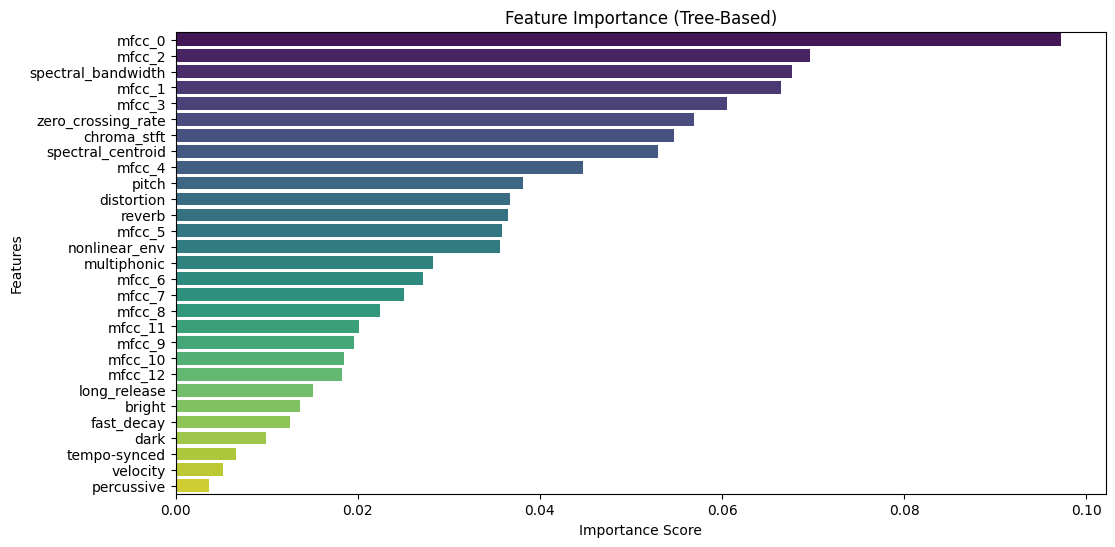

Top Selected Features: ['mfcc_0', 'mfcc_2', 'spectral_bandwidth', 'mfcc_1', 'mfcc_3', 'zero_crossing_rate', 'chroma_stft', 'spectral_centroid', 'mfcc_4', 'pitch', 'distortion', 'reverb', 'mfcc_5', 'nonlinear_env', 'multiphonic']


In [96]:
from sklearn.ensemble import RandomForestClassifier # As this is a classification problem, we'll use RF's classifier

# Define features (X) and target variable (y)
X = df_transformed.drop(columns=["instrument_family"])  # Exclude target column
y = df_transformed["instrument_family"]  # Classification target

# Initialise and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importance = rf.feature_importances_

# Create a DataFrame for visualisation
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance (Tree-Based)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Select top 15 features 
top_n = 15
top_features_rf = importance_df.iloc[:top_n]["Feature"].tolist()

# Display selected features
print("Top Selected Features:", top_features_rf)


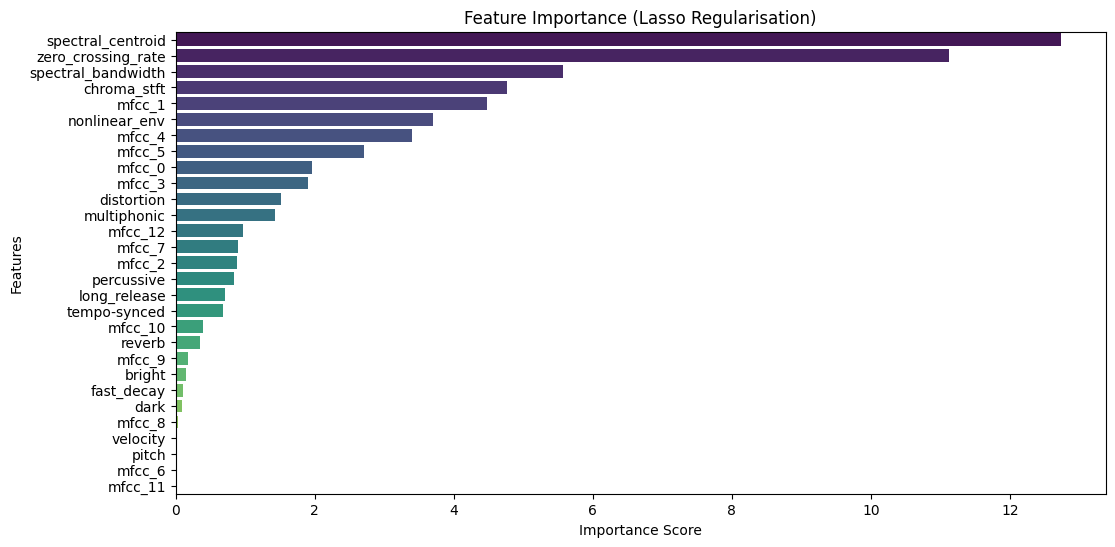

Top Selected Features using Lasso: ['spectral_centroid', 'zero_crossing_rate', 'spectral_bandwidth', 'chroma_stft', 'mfcc_1', 'nonlinear_env', 'mfcc_4', 'mfcc_5', 'mfcc_0', 'mfcc_3', 'distortion', 'multiphonic', 'mfcc_12', 'mfcc_7', 'mfcc_2']


In [98]:
from sklearn.linear_model import LassoCV 

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)

# Get feature importances (coefficients from the trained model)
feature_importance_lasso = abs(lasso.coef_)

# Create a DataFrame for visualisation
importance_lasso_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance_lasso
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_lasso_df, palette="viridis")
plt.title("Feature Importance (Lasso Regularisation)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Select top 15 features 
top_n = 15
top_features_lasso = importance_lasso_df.iloc[:top_n]["Feature"].tolist()

# Display selected features
print("Top Selected Features using Lasso:", top_features_lasso)

#### Overlapping Important Features

We will see the overlapping top features from each model, and use them to have a more robust feature set

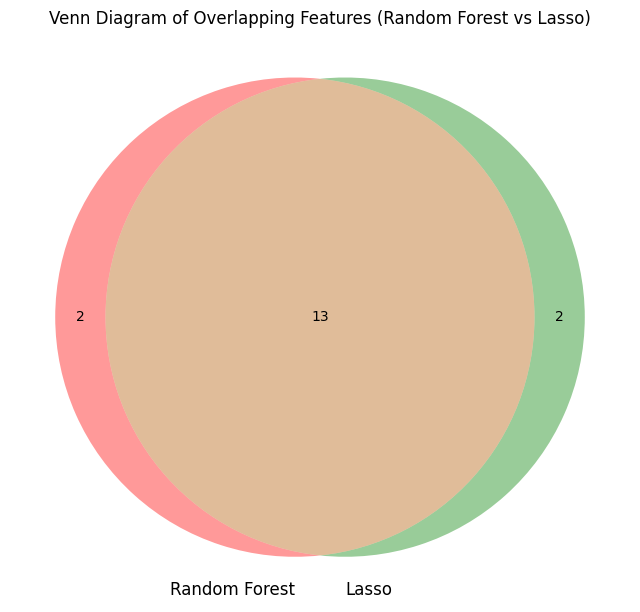

Overlapping Features: ['mfcc_2', 'mfcc_1', 'multiphonic', 'mfcc_0', 'zero_crossing_rate', 'spectral_bandwidth', 'mfcc_3', 'chroma_stft', 'nonlinear_env', 'distortion', 'mfcc_5', 'mfcc_4', 'spectral_centroid']


In [47]:
from matplotlib_venn import venn2

set_rf = set(top_features_rf)
set_lasso = set(top_features_lasso)

# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn = venn2([set_rf, set_lasso], set_labels=('Random Forest', 'Lasso'))

# Customise the plot
plt.title("Venn Diagram of Overlapping Features (Random Forest vs Lasso)")
plt.show()

overlapping_features = list(set(top_features_rf).intersection(set(top_features_lasso)))

# Display the overlapping features
print("Overlapping Features:", overlapping_features)


As we can see from the above Venn diagram, 13 of the top 15 features overlap across both methods, and these will be the features we use for modelling

Most the important features involve attributes of the waveform through Mel Spectograms, rather than the sound qualities themselves

In [48]:
# Add target feature (instrument_family) for modelling
overlapping_features.append('instrument_family')

### 4.3. Data Splitting <a id=section4_3> </a>

Data splitting consists of separating the data in training and test sets. 

It is crucial as it allows the model to accuratley evaluate model performance on unseen data (test data) as the separation prevents overfitting (where a model fits it's training data too well and fails to generalise it to the test data)


In [90]:
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

df_final = df_transformed[overlapping_features]

X = df_final.drop(columns=["instrument_family"])
y = df_final["instrument_family"]

X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.long) #.long used for integer class labels in classification

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0) #Use batch_size of 16 to improve accuracy in expense for slower training 
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=0)

## 5. Modelling the CNN <a class="anchor" id="chapter5"></a>

Now we can move onto modelling the CNN and training it on this prepped data. Let's discuss what we'll be going through in this section

A CNN is a type of deep learning model that is especially good for tasks such as image classification, time-series analysis, and other problems where spatial or temporal relationships are important. CNNs are composed of layers that automatically learn spatial hierarchies of features.

In this case, we are applying a 1D CNN to a dataset with 13 input features, to a sequence of data points ( time-series and audio features), and this model is tasked with classifying these sequences into one of 11 classes.

### 5.1. Defining the CNN Architecture <a id=section5_1></a>

#### Model Architecture Overview

| **Step**                 | **Description**                                                                                             |
|:--------------------------|:-------------------------------------------------------------------------------------------------------------|
| **Input Layer**               | The input consists of the 13 selected features representing the characteristics of each sample. |
| **Convolutional Layers**      | This layer applies filters (or kernels) to the input to extract features. In sound, these filters can detect patterns like frequency components or spectral features that are characteristics of different instruments.|
| **Activation Function (ReLU)**| After Convolutional, this step adds non-linearity, allowing the network to learn more complex patterns. E.g.  ReLU will activate features that contribute meaningfully to instrument identification and suppress those that don’t|
| **Pooling Layers**            | After convolution, max pooling (takes the max value from a filter) is applied to down-sample the data. This reduces dimensionality and allows the model to focus on more important features
| **Fully Connected Layers**    | After the several layers of convolution and pooling, the output is flattened - turned into a 1D vector - and passed through the FC layers. These layers take the features learned through convolution and combines them to finally decide what instrument family the sound comes from |
| **Output Layer**              | This layer - typically a softmax layer - outputs a probability distribution over all possible classes (instrument families). The class with the highest probability becomes the predicted instrument|


In [87]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNNModel(nn.Module):
    def __init__(self, input_size, num_classes, dropout_rate=0.0):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

        conv1_out = (input_size - 3 + 2 * 1) // 1 + 1
        conv1_out = (conv1_out - 2) // 2 + 1

        conv2_out = (conv1_out - 3 + 2 * 1) // 1 + 1
        conv2_out = (conv2_out - 2) // 2 + 1

        self.fc1_input_size = 128 * conv2_out

        self.fc1 = nn.Linear(self.fc1_input_size, 256)
        self.dropout = nn.Dropout(p=dropout_rate)  # Add dropout
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(x.size(0), -1)  
        x = nn.ReLU()(self.fc1(x))
        x = self.dropout(x)  
        x = self.fc2(x)
        return x

# input size - 13 features
input_size = 13
num_classes = 11  # Number of classes - instrumnet_family - target variable 

# Instantiate the model
model = CNNModel(input_size=input_size, num_classes=num_classes, dropout_rate=params['dropout_rate'])


# Print the model architecture
print(model)


CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc1): Linear(in_features=384, out_features=256, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=11, bias=True)
)


### 5.2. Training the CNN <a id=section5_2></a>

#### Model Training Overview

| **Parameter**                 | **Description**                                                                                             |
|:--------------------------|:-------------------------------------------------------------------------------------------------------------|
| **Loss Function** | Cross-Entropy Loss, commonly used for multi-class classification tasks like this, compare the model's prediction to the true label, and calculates how far off the prediction is to the true value. |
| **Adam Optimser** |  An optimiser adjusts the model's weights to reduce the loss during training. Adam stands for Adaptive Moment Estimation, and we use it as it automatically adjusts the learning rates and combines the benefits of momentum and RMSprop |
| **Learning Rate** | Determines how big the weight updates are after each step. We don't want the learning rate to be too high, as the model may never converge, or too low where the model might get stuck in a local minimum |
| **Momentum**      | An optimisation technique which helps avoid the model getting stuck in a local minimum |
| **RMSprop**       | Another optimsation technique which adapts learning rates |

---
| **Training Step**                 | **Description**                                                                                             |
|:--------------------------|:-------------------------------------------------------------------------------------------------------------|
| **Forward Pass** | Computes predictions using the CNN. During training, a batch of MFCC spectrograms and quality features is passed through the CNN layers. Each spectrogram moves through convolution, pooling, ReLU, and fully connected layers.
| **Compute Loss** | Explained above in model architecture |
| **Backpropogration** | Model needs to adjust weights to improve predictions. To do this, we compute gradients which indicate how much each weight contributed to the loss. These gradients flow backward through the network to adjust all layers. Each layer's weights are adjusted to reduce loss in the next forward pass. We use `loss.backward()` |
| **Update Weights** | Using Adam Optimiser and apply changes using `optimiser.step()`|


Epoch 1/10, Loss: 1.3714796268977578, Accuracy: 0.48175902188917374
Validation Loss: 0.9487083216883102, Validation Accuracy: 0.6577287066246057
Epoch 2/10, Loss: 0.8045597572337941, Accuracy: 0.6879313744823506
Validation Loss: 0.6734577373326199, Validation Accuracy: 0.7405362776025236
Epoch 3/10, Loss: 0.6401269712752724, Accuracy: 0.7486689015973181
Validation Loss: 0.5622779072830512, Validation Accuracy: 0.8095425867507886
Epoch 4/10, Loss: 0.5429205842762715, Accuracy: 0.7883060540327351
Validation Loss: 0.493877666457644, Validation Accuracy: 0.8225552050473186
Epoch 5/10, Loss: 0.4725961461663246, Accuracy: 0.8166042200749359
Validation Loss: 0.46343184351546207, Validation Accuracy: 0.832807570977918
Epoch 6/10, Loss: 0.42497915317442514, Accuracy: 0.8363241964109643
Validation Loss: 0.3911949061091591, Validation Accuracy: 0.8584384858044164
Epoch 7/10, Loss: 0.3892810176411638, Accuracy: 0.8485505817393019
Validation Loss: 0.39145795187953886, Validation Accuracy: 0.8501577

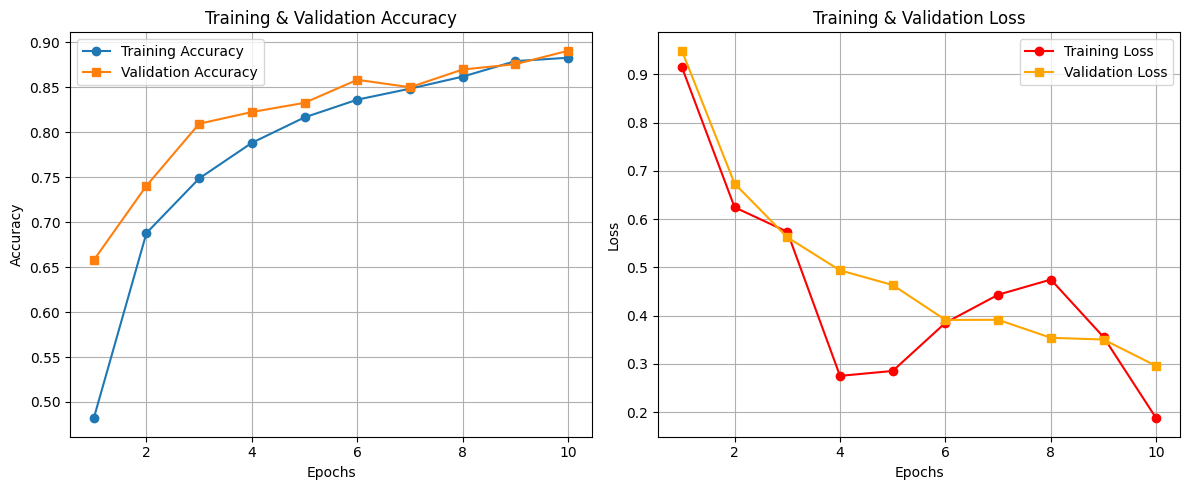

In [88]:
# Loss function and optimiser
criterion = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, test_loader, criterion, optimiser, epochs=10, patience=3):
    best_val_loss = float('inf')  # Track best validation loss
    epochs_without_improvement = 0  # Counter for early stopping
    
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        
        for inputs, labels in train_loader:
            inputs = inputs.unsqueeze(1)  # Add channel dimension
            
            optimiser.zero_grad()
            outputs = model(inputs)  
            loss = criterion(outputs, labels)
            loss.backward()
            optimiser.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
        
        train_accuracy = correct_predictions / total_predictions
        
        # Store training metrics
        train_losses.append(loss.item())
        train_accuracies.append(train_accuracy)
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}, Accuracy: {train_accuracy}")

        # Evaluate on validation set
        val_loss, val_accuracy = evaluate_model(model, test_loader, criterion)
        
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Early Stopping Check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0  # Reset counter if validation improves
        else:
            epochs_without_improvement += 1
            print(f"Early stopping patience: {epochs_without_improvement}/{patience}")

        if epochs_without_improvement >= patience:
            print("Early stopping triggered! Stopping training.")
            break  # Stop training early if patience is exceeded

     # Plot Training & Validation Loss/Accuracy
    plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)
    
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs.unsqueeze(1))  
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
    
    test_accuracy = correct_predictions / total_predictions
    avg_test_loss = test_loss / len(test_loader)
    
    print(f"Validation Loss: {avg_test_loss}, Validation Accuracy: {test_accuracy}")
    
    return avg_test_loss, test_accuracy  # Return both loss and accuracy



def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, np.array(train_accuracies), label="Training Accuracy", marker='o')
    plt.plot(epochs, np.array(val_accuracies), label="Validation Accuracy", marker='s')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.legend()
    plt.grid()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, np.array(train_losses), label="Training Loss", marker='o', color='red')
    plt.plot(epochs, np.array(val_losses), label="Validation Loss", marker='s', color='orange')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# Start training
train_model(model, train_loader, test_loader, criterion, optimiser, epochs=10)


As we can see, the model has a training and validation score of around 89%.

We can see from the accuracy graph, the model doesn't seem to fully converge yet, especially for validation score. Also, the training loss is more volatile, which may suggest a need for tuning learning rate or regularisation.

So let's try hyper-parameter tuning the model to see if we can improve the accuracy, and allow it to converge more.

### 5.3. Hyper-parameter tuning <a id=section_5_3 ></a>


In hyper-parameter tuning, we will explore the optimum values of the following parameters:

- **`learning_rate`**: Adjust to find the optimum value for a stable model that converges well

- **`batch_size`**: The number of samples processed at once in training. The aim is to find the right balance between efficient computation (speed of training) and accuracy.
- **`num_epochs`**: An epoch represents one complete pass through the neural network. Find the optimum value to reduce overfitting. We use early stopping with a patience of 3 to aid this. This means if the model doesn't improve after three epochs, the training stops.
- **`dropout_rate`**: A regularisation technique that reduces overfitting by randomly setting a fraction of neurons to zero during training, preventing the model from relying too much on specific features and improving generalisation to unseen data.

In [66]:
import torch.optim as optim
from sklearn.model_selection import ParameterGrid

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'batch_size': [16, 32],
    'num_epochs': [10, 20],
    'optimiser': [optim.Adam],  # Sticking to Adam Optimiser
    'dropout_rate': [0.2, 0.3]  # Tune dropout 
}

best_acc = 0
best_params = None

for params in ParameterGrid(param_grid):
    print(f"\nTraining with params: {params}")
    
    model = CNNModel(input_size=input_size, num_classes=num_classes, dropout_rate=params['dropout_rate'])
    optimiser = params['optimiser'](model.parameters(), lr=params['learning_rate'])
    
    batch_size = params['batch_size']
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    criterion = nn.CrossEntropyLoss()
    train_model(model, train_loader, test_loader, criterion, optimiser, epochs=params['num_epochs'], patience=3)

    val_loss, val_accuracy = evaluate_model(model, test_loader, criterion)  

    if val_accuracy > best_acc:
        best_acc = val_accuracy
        best_params = params

print(f"\nBest Hyperparameters: {best_params}")





Training with params: {'batch_size': 16, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'num_epochs': 10, 'optimizer': <class 'torch.optim.adam.Adam'>}
Epoch 1/10, Loss: 1.1635301916005107, Accuracy: 0.5482153421415894
Validation Loss: 0.7438478226181846, Validation Accuracy: 0.7137223974763407
Epoch 2/10, Loss: 0.707396100730597, Accuracy: 0.7226385328337606
Validation Loss: 0.6721174969050869, Validation Accuracy: 0.7578864353312302
Epoch 3/10, Loss: 0.6261281256655037, Accuracy: 0.7577400907118912
Validation Loss: 0.6057730852245534, Validation Accuracy: 0.7665615141955836
Epoch 4/10, Loss: 0.577868437905699, Accuracy: 0.7772628672845593
Validation Loss: 0.5252807936953299, Validation Accuracy: 0.8028391167192429
Epoch 5/10, Loss: 0.5271784743229485, Accuracy: 0.7995464405442714
Validation Loss: 0.46305929902214676, Validation Accuracy: 0.8194006309148265
Epoch 6/10, Loss: 0.5051462740199612, Accuracy: 0.8035890356931572
Validation Loss: 0.4552077533642076, Validation Accuracy: 0.8387

As we can see above, the best parameters for this model are:
| Parameter | Impact on Model |
|:---------------|:-----------|
|`batch_size: 16`| A smaller batch size looks to increase the performance of the model but in expense of training speed.|
|`dropout_rate: 0.2` | A smaller dropout rate means a lower probability of randomly deactivates 20% of the  neurons in the network to prevent overfitting while still allowing the network to train effectively.|
|`learning_rate: 0.001` | A common learning rate for Adam Optimiser. It's neither too large (which could cause instability) nor too small (which could make convergence too slow).|
|`num_epochs: 20`| A moderate number of epochs, allowing enough time for training to converge while avoiding overfitting. Early stopping will prevent unnecessary extra epochs if the model stops improving.|
|`optimiser: Adam`| Only optimiser used |


Let's finally train the model with these parameters, and analyse it's accuracy

### 5.4. Final Model Evaluation <a id=section5_4 ></a>

Epoch 1/20, Loss: 1.3725696010074404, Accuracy: 0.4915204101755078
Validation Loss: 0.9316266651423473, Validation Accuracy: 0.6317034700315457
Epoch 2/20, Loss: 0.7850201440158326, Accuracy: 0.6973969631236443
Validation Loss: 0.6420194887140263, Validation Accuracy: 0.7697160883280757
Epoch 3/20, Loss: 0.6109829745035066, Accuracy: 0.7661210806547032
Validation Loss: 0.5849767998329498, Validation Accuracy: 0.7933753943217665
Epoch 4/20, Loss: 0.5199660666474972, Accuracy: 0.8009268388877934
Validation Loss: 0.46983860948550626, Validation Accuracy: 0.8288643533123028
Epoch 5/20, Loss: 0.45513289439424354, Accuracy: 0.8307040031551962
Validation Loss: 0.43855620414580937, Validation Accuracy: 0.8402996845425867
Epoch 6/20, Loss: 0.40896576245194916, Accuracy: 0.8446065864720962
Validation Loss: 0.38006368031104404, Validation Accuracy: 0.8631703470031545
Epoch 7/20, Loss: 0.37608406541146316, Accuracy: 0.8581147702622757
Validation Loss: 0.4186287389002131, Validation Accuracy: 0.838

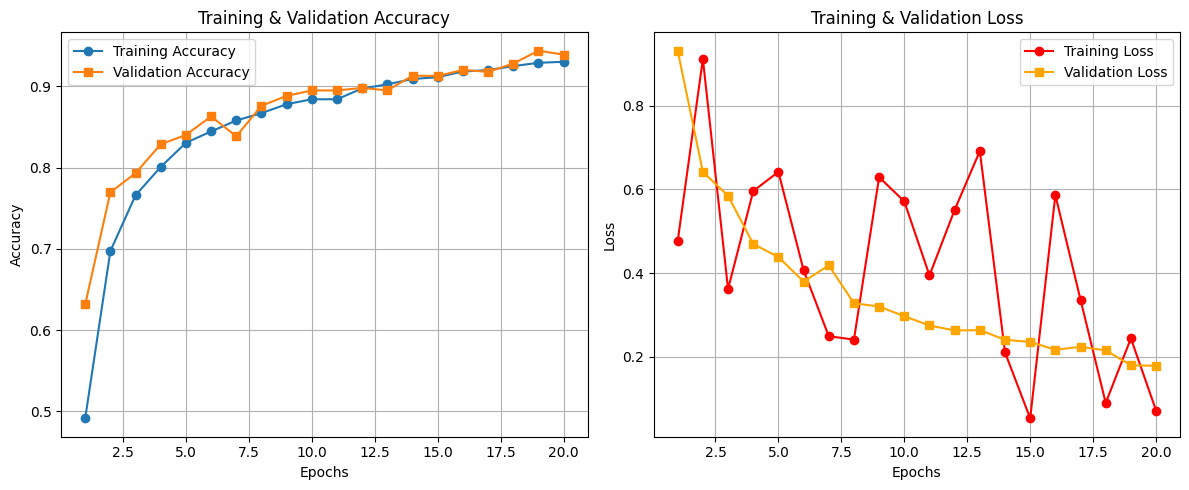


Final Model Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       522
           1       0.98      0.97      0.97       170
           2       1.00      0.99      0.99        98
           3       0.93      0.87      0.90       462
           4       0.88      0.93      0.90       471
           5       0.99      0.94      0.97       121
           6       0.99      0.95      0.97       305
           7       0.96      1.00      0.98       127
           8       0.98      0.96      0.97       186
          10       1.00      0.99      0.99        74

    accuracy                           0.94      2536
   macro avg       0.96      0.96      0.96      2536
weighted avg       0.94      0.94      0.94      2536

Confusion Matrix:
[[499   0   0   3  19   0   0   0   1   0]
 [  0 165   0   0   0   0   0   5   0   0]
 [  0   1  97   0   0   0   0   0   0   0]
 [ 21   2   0 401  36   1   0   0   1   0]
 [ 17   0   0  14 437   0 

In [89]:
# Best hyperparameters from tuning
best_params = {
    'batch_size': 16,
    'dropout_rate': 0.2,
    'learning_rate': 0.001,
    'num_epochs': 20,
    'optimiser': torch.optim.Adam  # Use the correct optimiser class
}



# Define Model Architecture
class CNNModel(nn.Module):
    def __init__(self, input_size, num_classes, dropout_rate=0.2):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        conv1_out = (input_size - 3 + 2 * 1) // 1 + 1  
        conv1_out = (conv1_out - 2) // 2 + 1  
        conv2_out = (conv1_out - 3 + 2 * 1) // 1 + 1  
        conv2_out = (conv2_out - 2) // 2 + 1  

        self.fc1_input_size = 128 * conv2_out  

        self.fc1 = nn.Linear(self.fc1_input_size, 256)
        self.dropout = nn.Dropout(p=dropout_rate)  # Apply dropout
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = nn.ReLU()(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        return x

# Initialise the model with the best dropout rate
model = CNNModel(input_size=13, num_classes=11, dropout_rate=best_params['dropout_rate'])

# Use best optimiser and learning rate
optimiser = best_params['optimiser'](model.parameters(), lr=best_params['learning_rate'])

# Create data loaders with best batch size
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=best_params['batch_size'], shuffle=False, num_workers=0)

# Train the model
train_model(model, train_loader, test_loader, criterion, optimiser, epochs=best_params['num_epochs'])

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_final_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs.unsqueeze(1))
            _, predicted = torch.max(outputs, 1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    
    print("\nFinal Model Evaluation:")
    print(classification_report(all_labels, all_preds))

    print("Confusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))

# Evaluate
evaluate_final_model(model, test_loader)


#### Final Model Performance Analysis
Our model has achieved 94% accuracy on the unseen data, which is an excellent result! Let's break down the results:

---
#### Key Observations
- **High Accuracy (94%)** – Our model generalises well and correctly classifies most instrument families. Since validation accuracy is close to training accuracy, there is no significant overfitting, indicating a well-trained model.
---
- **Precision & Recall Analysis**:
    - Class 2 & 10 (Flute & Vocal) have a near perfect score (0.99) – meaning minimal misclassifications.
    - Class 4 (Keyboard) has a lower precision (0.88) but higher recall (0.93). This means it's classifying most actual keyboards correctly, but it also misclassifies other instruments as keyboards sometimes.
    - Class 3 (Guitar) has lower recall (0.87), meaning some guitars are classified as other instrument families.
---
- **Confusion Matrix Insights**:
    - Class 4 (Keyboard) is confused with Class 3 (Guitar) → Likely an overlap in features (such as similar timbre).
    - Class 0 (Bass) has 17 misclassifications into Class 4 (Keyboard) and 21 misclassifications into Class 3 (Guitar) → I suspect the bass notes closely resemble the charateristics of low notes of keyboards anmd guitars .

We can now save the highly accurate model below:

In [92]:
torch.save(model.state_dict(), "best_cnn_model.pth")
print("Model saved as best_cnn_model.pth")

Model saved as best_cnn_model.pth


In [94]:
model = CNNModel(input_size=13, num_classes=11, dropout_rate=0.2)  # Use same architecture
model.load_state_dict(torch.load("best_cnn_model.pth"))
model.eval()  # Set model to evaluation mode
print("Model loaded successfully!")

evaluate_final_model(model, test_loader)

Model loaded successfully!

Final Model Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       522
           1       0.98      0.97      0.97       170
           2       1.00      0.99      0.99        98
           3       0.93      0.87      0.90       462
           4       0.88      0.93      0.90       471
           5       0.99      0.94      0.97       121
           6       0.99      0.95      0.97       305
           7       0.96      1.00      0.98       127
           8       0.98      0.96      0.97       186
          10       1.00      0.99      0.99        74

    accuracy                           0.94      2536
   macro avg       0.96      0.96      0.96      2536
weighted avg       0.94      0.94      0.94      2536

Confusion Matrix:
[[499   0   0   3  19   0   0   0   1   0]
 [  0 165   0   0   0   0   0   5   0   0]
 [  0   1  97   0   0   0   0   0   0   0]
 [ 21   2   0 401  36   1   0   0   1   0]

## 6. Conclusion & Future Work <a class="anchor" id="chapter6"></a>

In this tutorial, we were able to build a model that attained a 94% accuracy of classifying instruments in nsynth dataset. This is a very good result, however there is a downside to using this dataset - these sounds are all generated through neural networks. This means this model may lack a practical approach as the data doesn't come from the real-world, it's very refined (not very noisy) and robotic. Due to time constraints, I would have liked to seen how the model performs on real-world, noisy data, and see if it brings similar results in prediction.

Furthermore, due to limited computation capability (no gpu on my machine), I would have liked to use a wider parameter space for hyper-parameter tuning, such as more number of epochs, experimenting with different optimisers (such as Stochastic Gradient Descent), and more dropout rates, to see if it would increase model convergence speed. 

Also due to time constraints, I would have liked to experiment with data augmentation, such as down sampling some sounds, or randomly pitch shifting sounds to reduce misclassifications. All sounds were sampled at 16kHz - experimenting with higher sample rate sounds (higher quality) would have been interesting in seeing how it would have effected model performance.

References:
- ['An introduction to Audio Classification with Keras' - Mostafa Ibrahim 2024](https://wandb.ai/mostafaibrahim17/ml-articles/reports/An-Introduction-to-Audio-Classification-with-Keras--Vmlldzo0MDQzNDUy?utm_source=chatgpt.com)
- ['Guide to Audio Classification Using Deep Learning' - Syed Abdul Gaffar 2023](https://www.analyticsvidhya.com/blog/2022/04/guide-to-audio-classification-using-deep-learning/?utm_source=chatgpt.com)
- ['Music and Instrument Classification using Deep Learning Technics' - Lara Haidar-Ahmad 2018](https://cs230.stanford.edu/projects_fall_2019/reports/26225883.pdf)
- [Magenta Nsynth TensorFlow Dataset Documentation](https://magenta.tensorflow.org/datasets/nsynth)
- ['Feature Selection in Machine Learning: Easy Explanation for Data Science Interviews' - Emma Ding 2023](https://www.youtube.com/watch?v=7tW29jBceRw)
- ['PyTorch Tutorial 14 - Convolutional Neural Network (CNN)'- Patrick Loeber 2020](https://www.youtube.com/watch?v=pDdP0TFzsoQ)
- ['Basics of Musical Instruments Classification with Machine Learning: CNN Keras - Update for Colab' - Guitars 4RL 2021](https://www.youtube.com/watch?v=-noJb2ztYvQ)
- [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
